<a href="https://colab.research.google.com/github/yoonjong8739/every_deeplearning/blob/master/Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 어텐션을 사용한 신경망

In [2]:
!pip install attention

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding, LSTM
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.callbacks import EarlyStopping
from attention import Attention

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
word_size = 5000
max_len = 1000

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=word_size)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

model = Sequential()
model.add(Embedding(input_dim=word_size, output_dim=max_len))
model.add(Dropout(0.5))
model.add(LSTM(64, return_sequences=True))
model.add(Attention())
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

es = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(X_train, y_train, batch_size=40, epochs=10,
                    validation_data=(X_test, y_test), callbacks=[es])

print("\nTest Accuracy : %.4f" % (model.evaluate(X_test, y_test)[1]))

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 1000)        5000000   
                                                                 
 dropout (Dropout)           (None, None, 1000)        0         
                                                                 
 lstm (LSTM)                 (None, None, 64)          272640    
                                                                 
 attention (Attention)       (None, 128)               20480     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                         

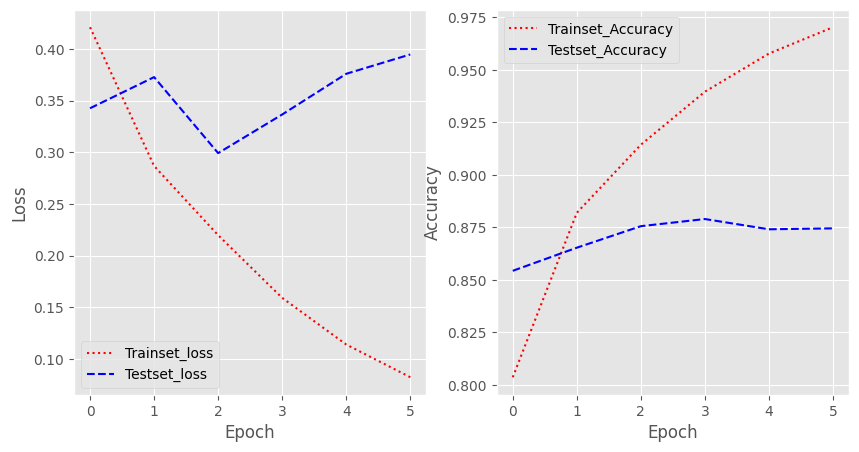

In [5]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vacc = history.history['val_acc']
y_acc = history.history['acc']

epoch = np.arange(len(y_loss))

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(epoch, y_loss, 'r:', label='Trainset_loss')
plt.plot(epoch, y_vloss, 'b--', label='Testset_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(epoch, y_acc, 'r:', label='Trainset_Accuracy')
plt.plot(epoch, y_vacc, 'b--', label='Testset_Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show();